# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [3]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)
df

C:\Users\shgla\AppData\Local\Temp\ipykernel_17192\3560383730.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,within an hour,100%,100%,f,5.0,5.0,"['email', 'phone', 'offline_government_id', 's...",t,f,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50792,42890730,within an hour,100%,99%,f,21.0,21.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50793,42891018,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50794,42891637,NaN,NaN,100%,f,2.0,2.0,"['email', 'phone', 'offline_government_id', 'g...",t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
pd.set_option('display.max_columns', None)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [5]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [6]:
#Q2
# Q2

# 각 컬럼의 결측치 확인
missing_values = df.isnull().sum()

# 결측치가 있는 컬럼만 선택
missing_values = missing_values[missing_values > 0]

# 결측치 비율 계산
missing_percentage = (missing_values / len(df)) * 100

# 데이터프레임 생성
missing_data_df = pd.DataFrame({
    '결측치 수': missing_values,
    '결측치 비율 (%)': missing_percentage
})

# 결측치가 많은 순서대로 정렬
missing_data_df = missing_data_df.sort_values(by='결측치 수', ascending=False)

missing_data_df

,결측치 수,결측치 비율 (%)
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

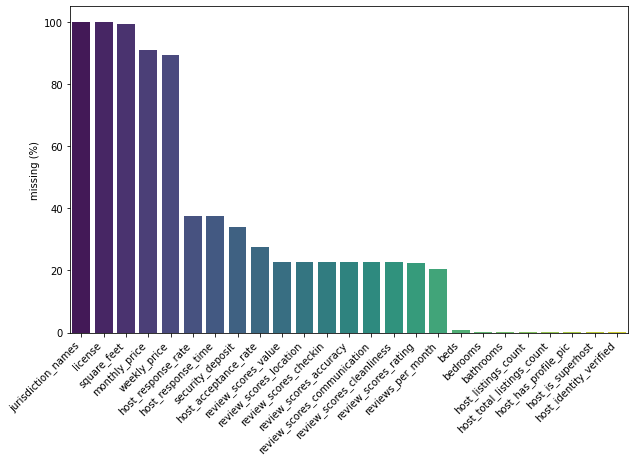

In [7]:
# Q3
# 데이터프레임 생성
missing_data_df = pd.DataFrame({
    'missing (%)': missing_percentage
})

# 결측치가 많은 순서대로 정렬
missing_data_df = missing_data_df.sort_values(by='missing (%)', ascending=False)

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_df.index, y='missing (%)', data=missing_data_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [8]:
# Q4
df[df['beds'].isnull()].head()


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [9]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [10]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

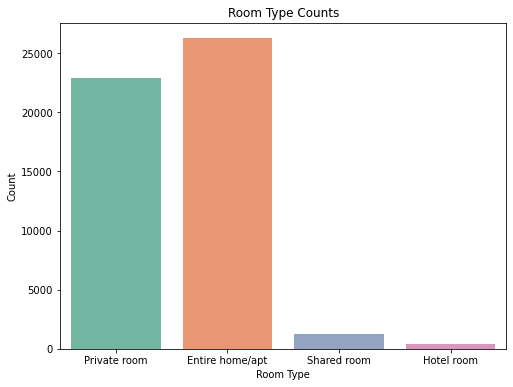

In [12]:
# Q5
# room_type의 종류별 갯수 세기
room_type_counts = df['room_type'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df, palette='Set2')
plt.title('Room Type Counts')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

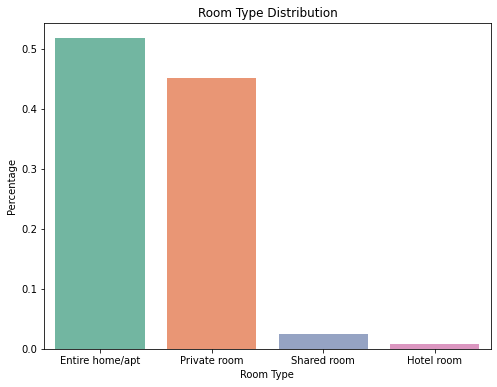

In [13]:
# Q6
# room_type의 종류별 비율 계산
room_type_percentage = df['room_type'].value_counts(normalize=True)

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_percentage.index, y=room_type_percentage.values, palette='Set2')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Percentage')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

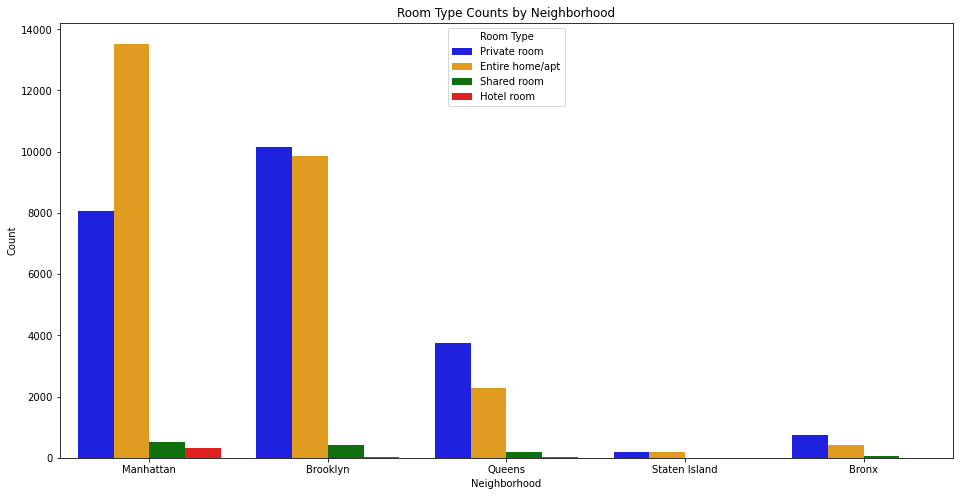

In [14]:
# Q7

plt.figure(figsize=(16, 8))
colors = {'Private room': 'blue', 'Entire home/apt': 'orange', 'Shared room': 'green', 'Hotel room': 'red'}
sns.countplot(x='neighborhood', hue='room_type', data=df, palette=colors)
plt.title('Room Type Counts by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

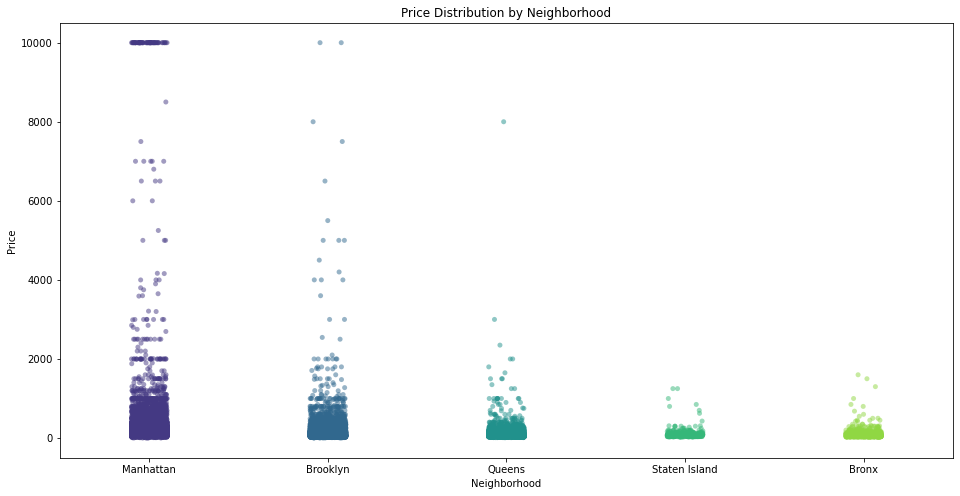

In [15]:
# Q8
plt.figure(figsize=(16, 8))
sns.stripplot(x='neighborhood', y='price', data=df, palette='viridis', alpha=0.5)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [25]:
# Q9

# Manhattan, Brooklyn, Queens, Bronx, Staten Island 순으로 Price가 높게 분포해 있다.
# 이유: 점들의 분포 range를 통해 알 수 있음

# Manhattan에는 초고가의 숙소가 타지역에 비해 많이 분포되어 있다.
# 이유: Manhattan은 높은 가격의 이상치를 가지고 있다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

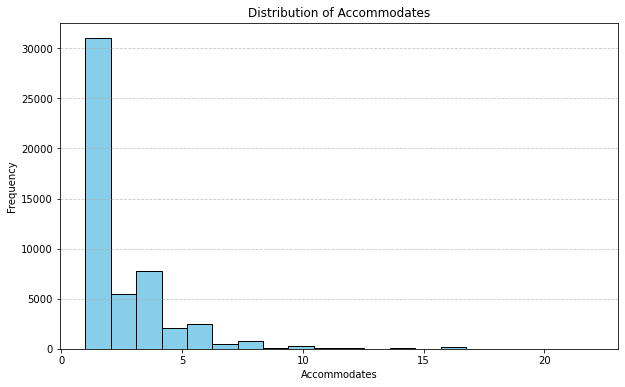

In [17]:
# Q10
plt.figure(figsize=(10, 6))
plt.hist(df['accommodates'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

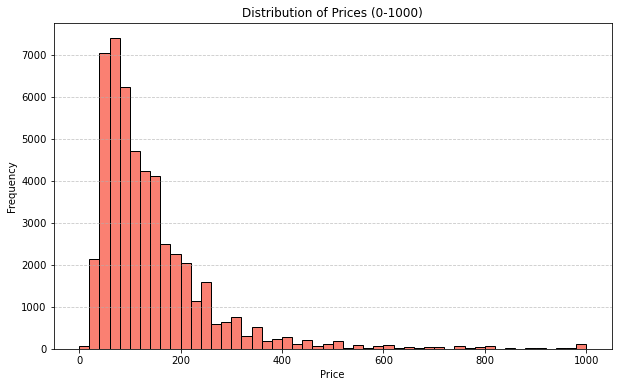

In [18]:
# Q11
# 가격이 0에서 1000 사이인 데이터만 선택
filtered_price = df[(df['price'] >= 0) & (df['price'] <= 1000)]['price']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.hist(filtered_price, bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Prices (0-1000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [38]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\shgla\AppData\Local\Temp\ipykernel_17192\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [24]:
#Q12

import pandas as pd
import numpy as np

def process_missing_values(df):
    # 데이터프레임 복사
    df_processed = df.copy()

    # 결측치가 25% 이상인 열 제거
    missing_threshold = 0.25
    df_processed = df_processed.dropna(thresh=len(df_processed) * (1 - missing_threshold), axis=1)

    # 결측치가 10% 이상 25% 미만인 행 제거
    missing_threshold_row = (0.1, 0.25)
    
    for column in df_processed.columns:
        if df_processed[column].isnull().mean() >= missing_threshold_row[0]:
            df_processed = df_processed.dropna(subset=[column])

    # 결측치가 10% 미만인 열의 결측치를 중앙값으로 대체
    missing_threshold_column = 0.1
    numeric_columns = df_processed.select_dtypes(include=np.number).columns
    for column in df_processed.columns:
        if df_processed[column].isnull().mean() == 0:  # 결측치 비율이 0인 경우
            continue  # 아무런 처리를 하지 않음
        if df_processed[column].dtype == 'object':
            if df_processed[column].isnull().mean() < missing_threshold_column:
                median_value = df_processed[column].mode()
                df_processed[column].fillna(median_value, inplace=True)
        elif column in numeric_columns and df_processed[column].isnull().mean() < missing_threshold_column:
            median_value = df_processed[column].median()
            df_processed[column].fillna(median_value, inplace=True)
        
    return df_processed

df_processed = process_missing_values(df)
print(df_processed.info())
df_processed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39365 entries, 0 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39365 non-null  int64  
 1   host_is_superhost                 39364 non-null  object 
 2   host_listings_count               39365 non-null  float64
 3   host_total_listings_count         39365 non-null  float64
 4   host_verifications                39365 non-null  object 
 5   host_has_profile_pic              39364 non-null  object 
 6   host_identity_verified            39364 non-null  object 
 7   neighborhood                      39365 non-null  object 
 8   latitude                          39365 non-null  float64
 9   longitude                         39365 non-null  float64
 10  is_location_exact                 39365 non-null  object 
 11  property_type                     39365 non-null  object 
 12  room

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi}",100,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,flexible,f,f,0.01
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,t,Villa,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",39,1,$0.00,1,1125,t,28,58,88,88,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Smoke detecto...",80,1,$0.00,2,21,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",55,2,$100.00,1,1125,t,0,23,53,328,2,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,t,Condominium,Entire home/apt,3,1.5,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",180,1,$0.00,21,1125,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [30]:
#Q13-1) 이상치 탐지
def detect_outliers_using_3sigma(data, threshold=3):
    mean_val = np.mean(data)
    std_dev = np.std(data)

    lower_bound = mean_val - threshold * std_dev
    upper_bound = mean_val + threshold * std_dev

    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

# 'price' 열에서 이상치 탐지
outliers_price = detect_outliers_using_3sigma(df_processed['price'])

'''
3시그마 규칙은 데이터가 정규분포를 따를 때, 약 99.7%의 데이터가 평균에서 ±3배의 표준편차 범위에 존재한다는 통계학적 원리를 기반으로 합니다.
해당 규칙은 이상치 탐지 방법 중에서도 간단하면서도 데이터가 많은 상황에서 효과적으로 이상치를 탐색할 수 있는 방법이므로 이 규칙을 선택했습니다.
또한 대다수의 자연 및 경제 현상은 데이터가 정규분포에 근접하기 때문에 일반적인 상황에 적용이 가능합니다.
특히 장소별 숙소 가격은 전형적인 경제 현상과 맞물려 있기 때문에 이 규칙을 선택했습니다. 
'''

'\n3시그마 규칙은 데이터가 정규분포를 따를 때, 약 99.7%의 데이터가 평균에서 ±3배의 표준편차 범위에 존재한다는 통계학적 원리를 기반으로 합니다.\n해당 규칙은 이상치 탐지 방법 중에서도 간단하면서도 데이터가 많은 상황에서 효과적으로 이상치를 탐색할 수 있는 방법이므로 이 규칙을 선택했습니다.\n또한 대다수의 자연 및 경제 현상은 데이터가 정규분포에 근접하기 때문에 일반적인 상황에 적용이 가능합니다.\n특히 장소별 숙소 가격은 전형적인 경제 현상과 맞물려 있기 때문에 이 규칙을 선택했습니다. \n'

In [39]:
unique_response_times = df['host_response_time'].unique()
print(unique_response_times)


['a few days or more' 'within a day' 'within an hour' nan
 'within a few hours']


In [37]:
#Q13-2) 범주형 데이터 인코딩

response_time_mapping = {
    'within an hour': 0,
    'within a few hours': 1,
    'within a day': 2,
    'a few days or more': 3
}

df['host_response_time'] = df['host_response_time'].map(response_time_mapping)


'''
host_response_time column의 값은 다음과 같다.
['a few days or more','within a day','within an hour',nan,'within a few hours']
이는 string으로 나타나 있지만 사실상 순서가 존재하는 범주형 데이터이다. 따라서 Label Encoding을 사용하여 인코딩을 진행했다.
'''

[ 3.  2.  0. nan  1.]


In [40]:
#Q13-3) 정규화
from sklearn.preprocessing import StandardScaler

# 'price' 컬럼 선택
price_data = df[['price']]

# StandardScaler 객체 생성
scaler = StandardScaler()

# Z-score normalization 수행
price_normalized = scaler.fit_transform(price_data)

# 정규화된 데이터를 기존 데이터프레임에 적용
df['price_normalized'] = price_normalized

# 정규화된 'price' 컬럼 확인
print(df[['price', 'price_normalized']])

'''
교육 세션을 통해 가장 흔하게 사용되는 정규화 방법은
Standard Scaling (Z-score Normalization)과 Min Max Scaling임을 학습했다.
Manhattan과 같은 지역의 price 이상치는 유의미한 정보를 담고 있기 때문에 이상치의 영향력이
줄어드는 Min Max Scaling보단 Standard Scaling (Z-score Normalization)을 사용하는 것이
유의미한 정보를 담을 수 있다고 생각했다.
'''

       price  price_normalized
0        100         -0.152844
1        225          0.135361
2         89         -0.178206
3        200          0.077720
4         94         -0.166678
...      ...               ...
50791    150         -0.037562
50792    149         -0.039868
50793    188          0.050052
50794   1100          2.152796
50795    450          0.654130

[50796 rows x 2 columns]


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
